In [ ]:
import pandas as pd
import pyvista as pv
import matplotlib.pyplot as plt
import nibabel as nib
from nibabel.testing import data_path
import glob
import os
from nilearn import plotting,image
import numpy as np


## Helper functions

In [51]:
def plot_2Dimg(data,steps = 10):
    coords = ['X','Y','Z']
    for coord_idx,coord in enumerate(coords):
        fig = plt.figure(coord_idx,figsize=(32, 24))
        fig.suptitle(coord+' component', fontsize=14)
        for idx,a in enumerate(np.linspace(0,data.shape[2]-1,steps).astype(int)):
            ax1 = fig.add_subplot(5,5,idx+1)
            im1 = ax1.imshow(data[:,:,a,coord_idx], interpolation='None')
            divider = make_axes_locatable(ax1)
            cax = divider.append_axes('right', size='5%', pad=0.05)
            fig.colorbar(im1, cax=cax, orientation='vertical', format='%.0e')

# Victor's COMSOL Coils

When exporting data from COMSOL. Ensure that the following components are exported **magnetic vector potential** and **magnetic flux density**. Furthermore, do not include the header information.

In [84]:
coil_files = glob.glob('/Volumes/Samsung_T5/Downloads/coils/*')
#coil_files

- Ax, Ay, Az are the magnetic vector potential components
- Bx, By, Bz are the magnetic flux density components

In [79]:
columns = ['x','y','z','Ax','Ay','Az','Bx','By','Bz']
data = pd.read_csv(coil_files[1],delim_whitespace=True,names=columns)
#data.dropna(inplace=True)
data.sort_values(by=['x','y','z'],inplace=True)
data.head()

x     y     z            Ax            Ay            Az            Bx  \
0 -15.0 -15.0 -15.0 -7.391536e-55  7.086962e-55  6.128033e-40  4.197946e-22   
1 -14.5 -15.0 -15.0  0.000000e+00  0.000000e+00  0.000000e+00 -7.801833e-06   
2 -14.0 -15.0 -15.0  0.000000e+00  0.000000e+00  0.000000e+00 -1.522922e-05   
3 -13.5 -15.0 -15.0  0.000000e+00  0.000000e+00  0.000000e+00 -2.265661e-05   
4 -13.0 -15.0 -15.0  0.000000e+00  0.000000e+00  0.000000e+00 -3.008400e-05   

             By            Bz  
0 -3.629926e-07  4.197946e-22  
1  0.000000e+00  0.000000e+00  
2  0.000000e+00  0.000000e+00  
3  0.000000e+00  0.000000e+00  
4  0.000000e+00  0.000000e+00

Retrieve grid coordinates and set the values according to their component direction (x,y,z)

In [81]:
x,y,z, *_,= data.nunique()
data_x =  data.to_numpy()[:,6].reshape(x,y,z)
data_y =  data.to_numpy()[:,7].reshape(x,y,z)
data_z =  data.to_numpy()[:,8].reshape(x,y,z)

In [82]:
data_3D = np.stack((data_x,data_y,data_z),axis=-1).astype('float32')
data_3D.shape

(61, 61, 61, 3)

## 2D Plot

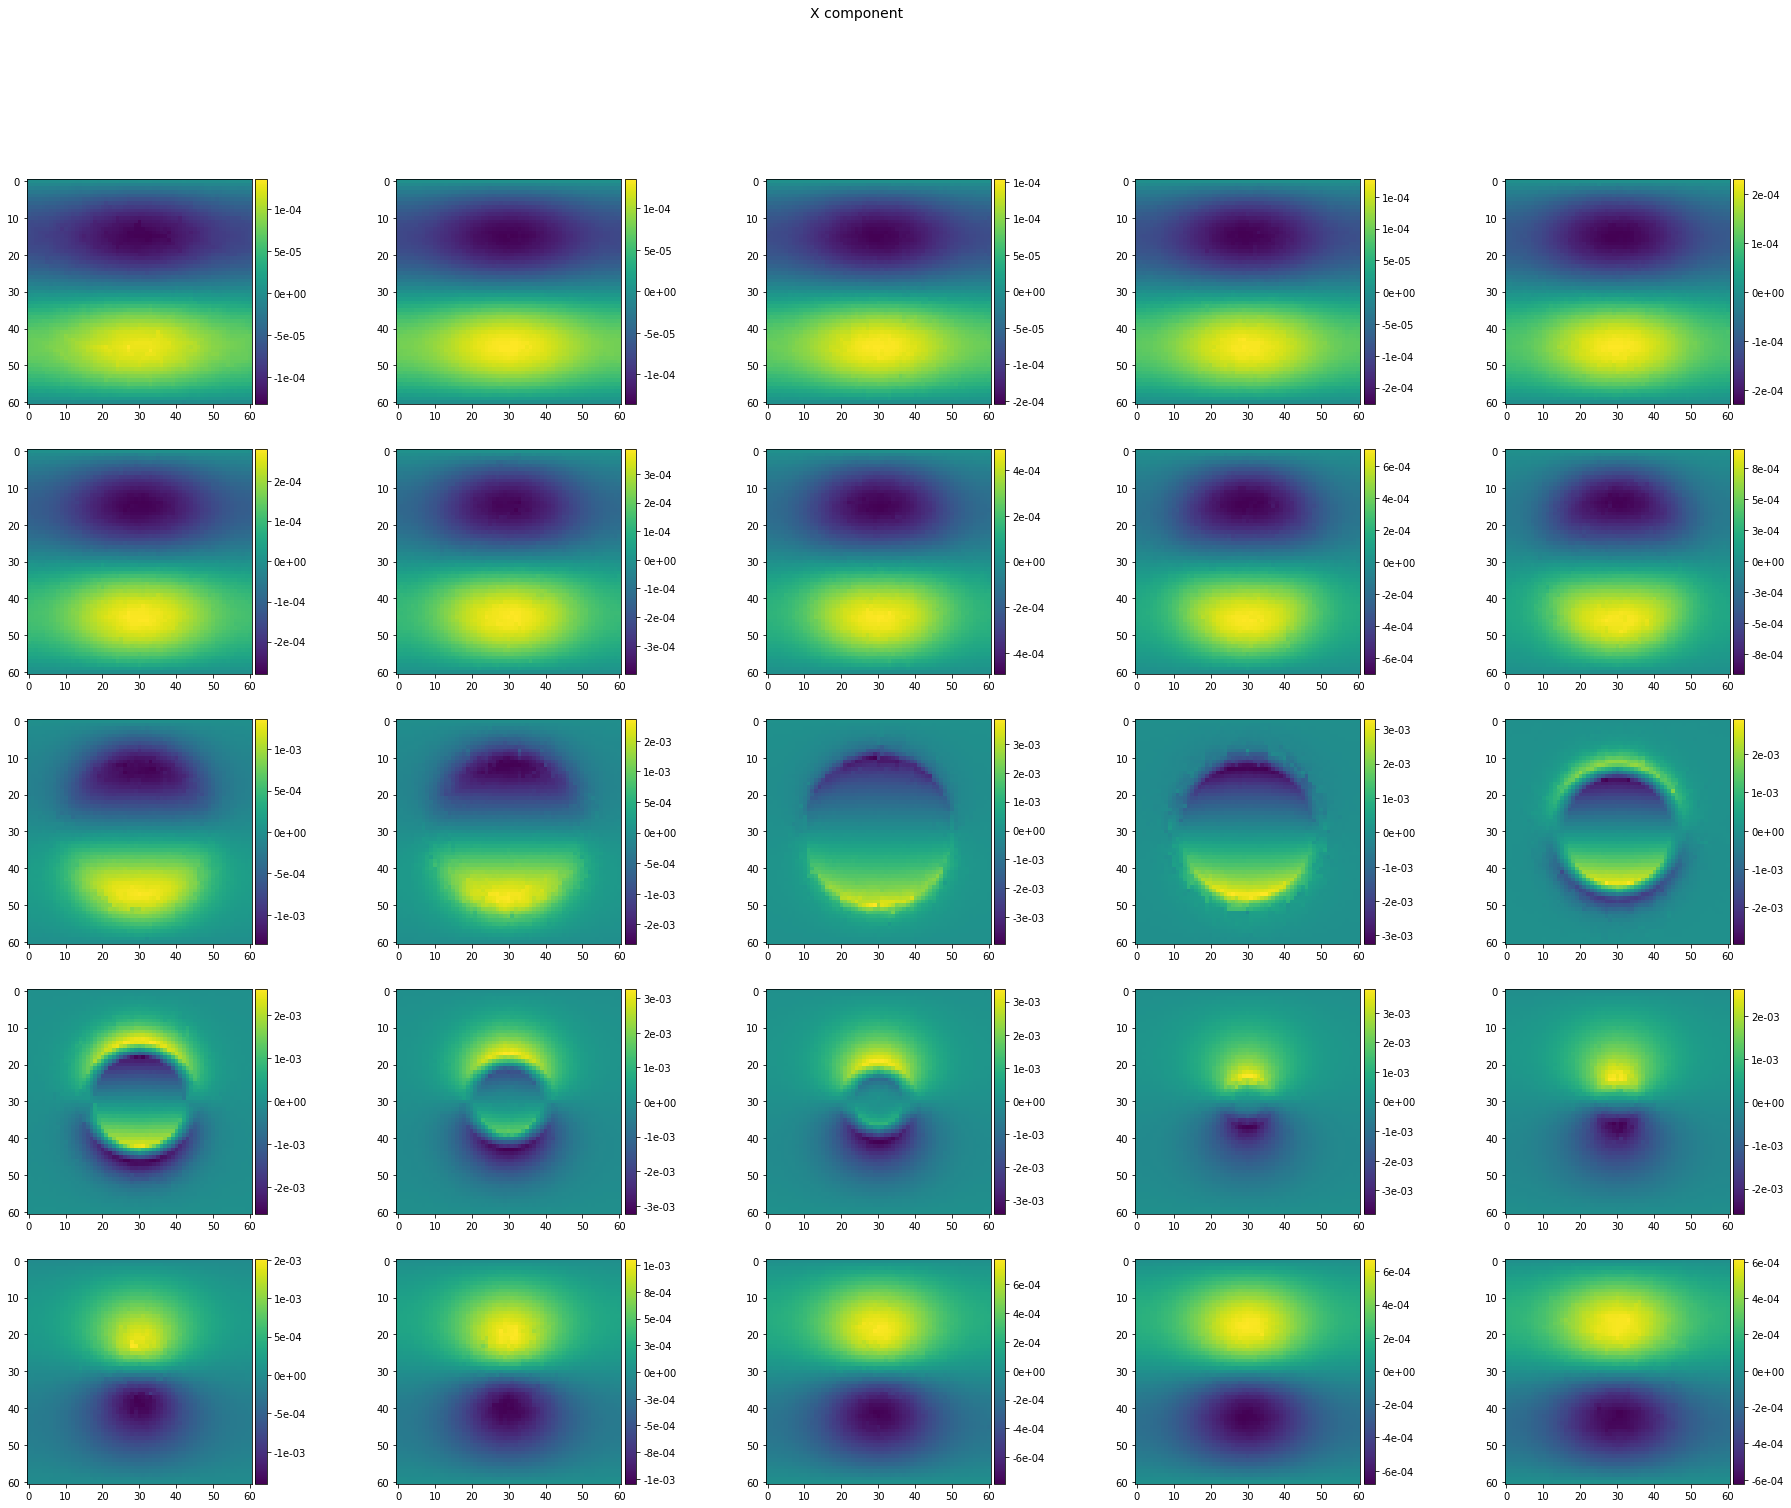

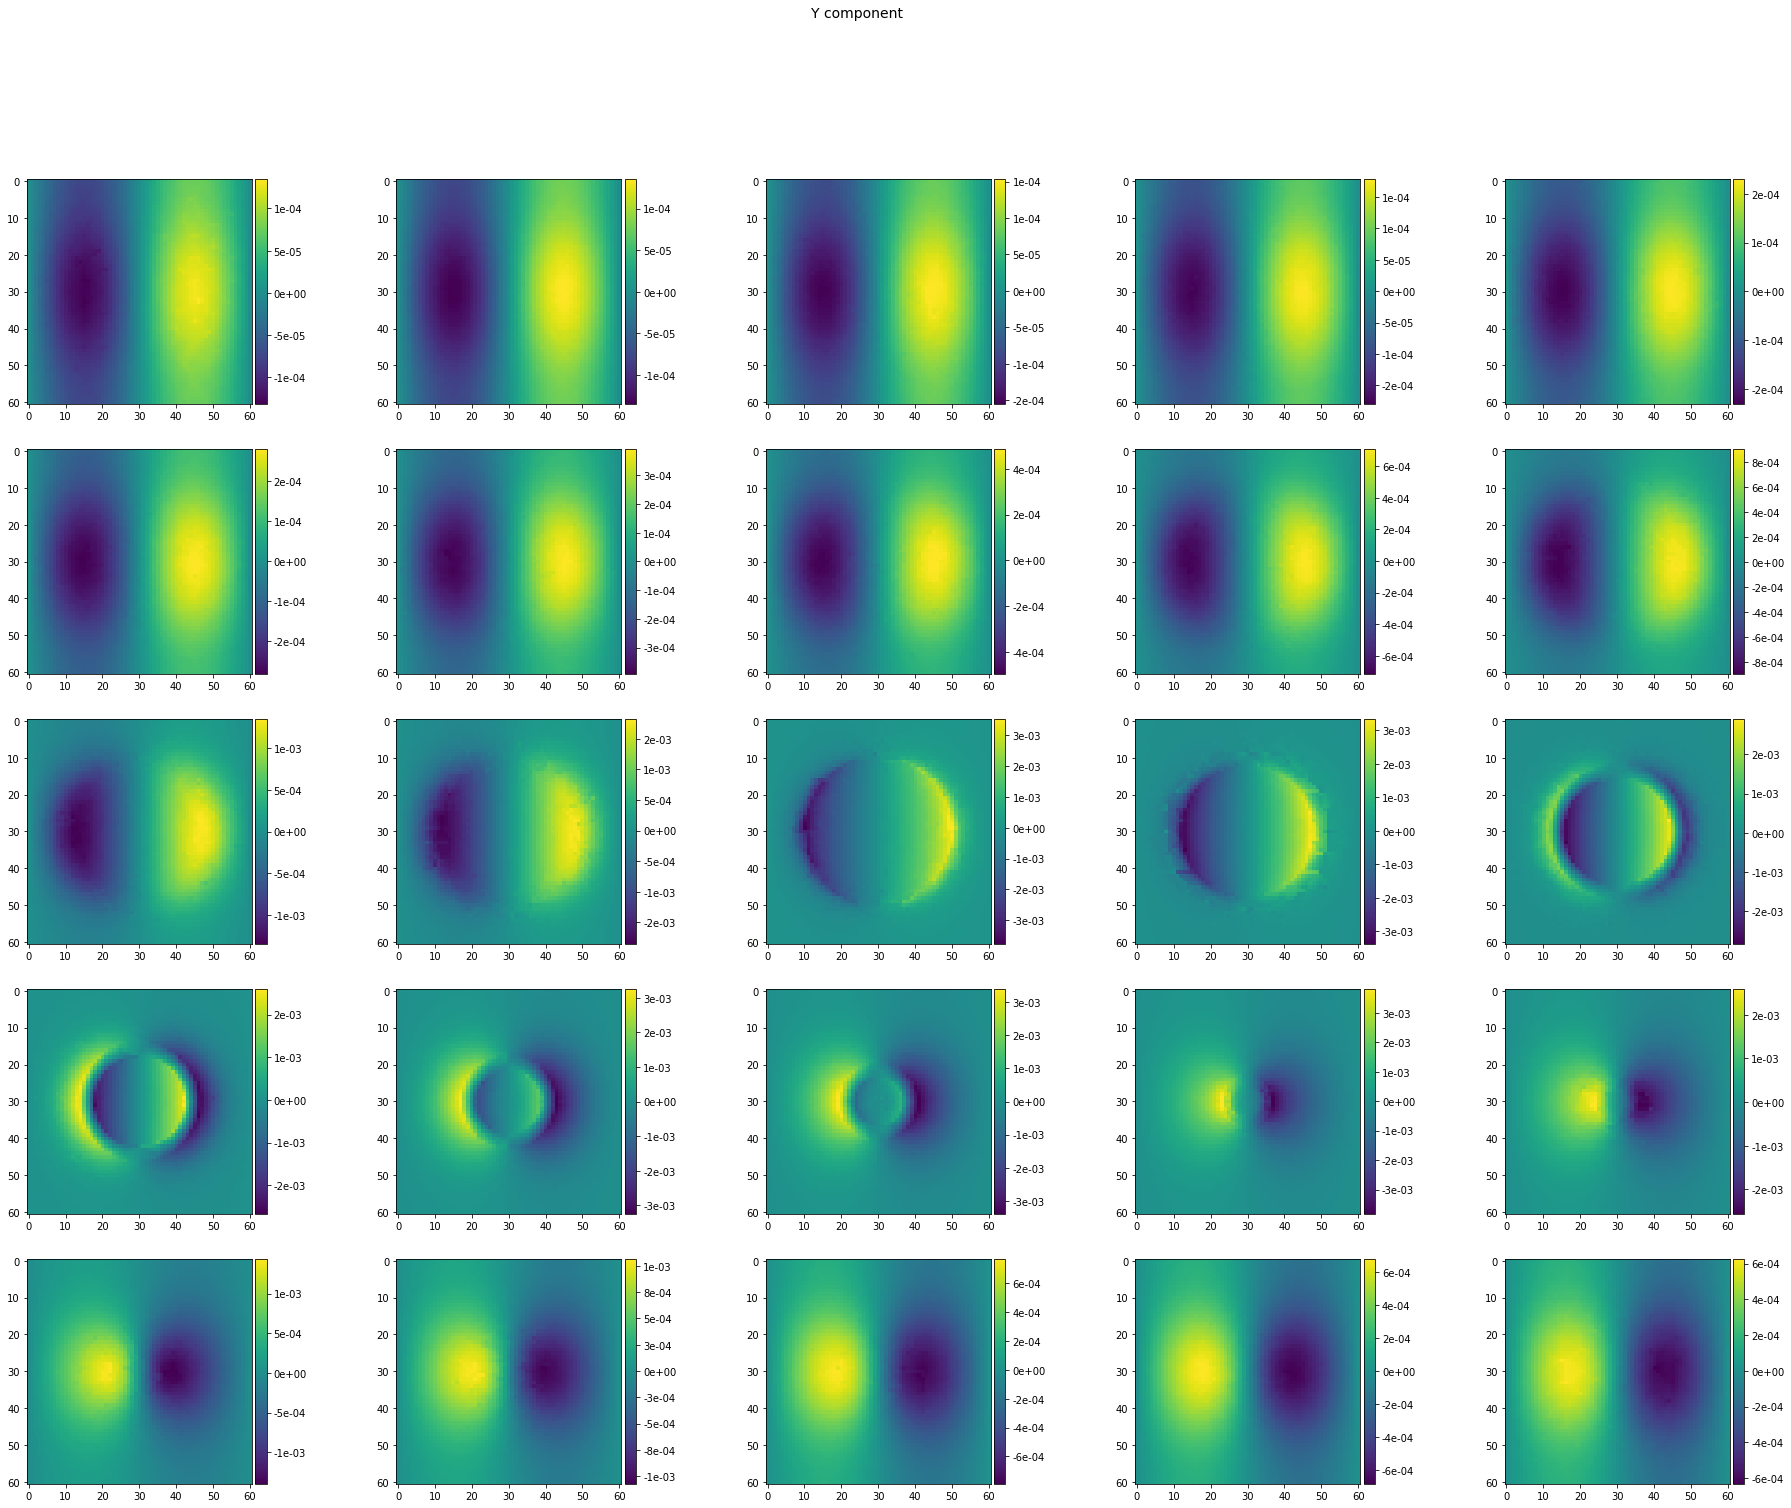

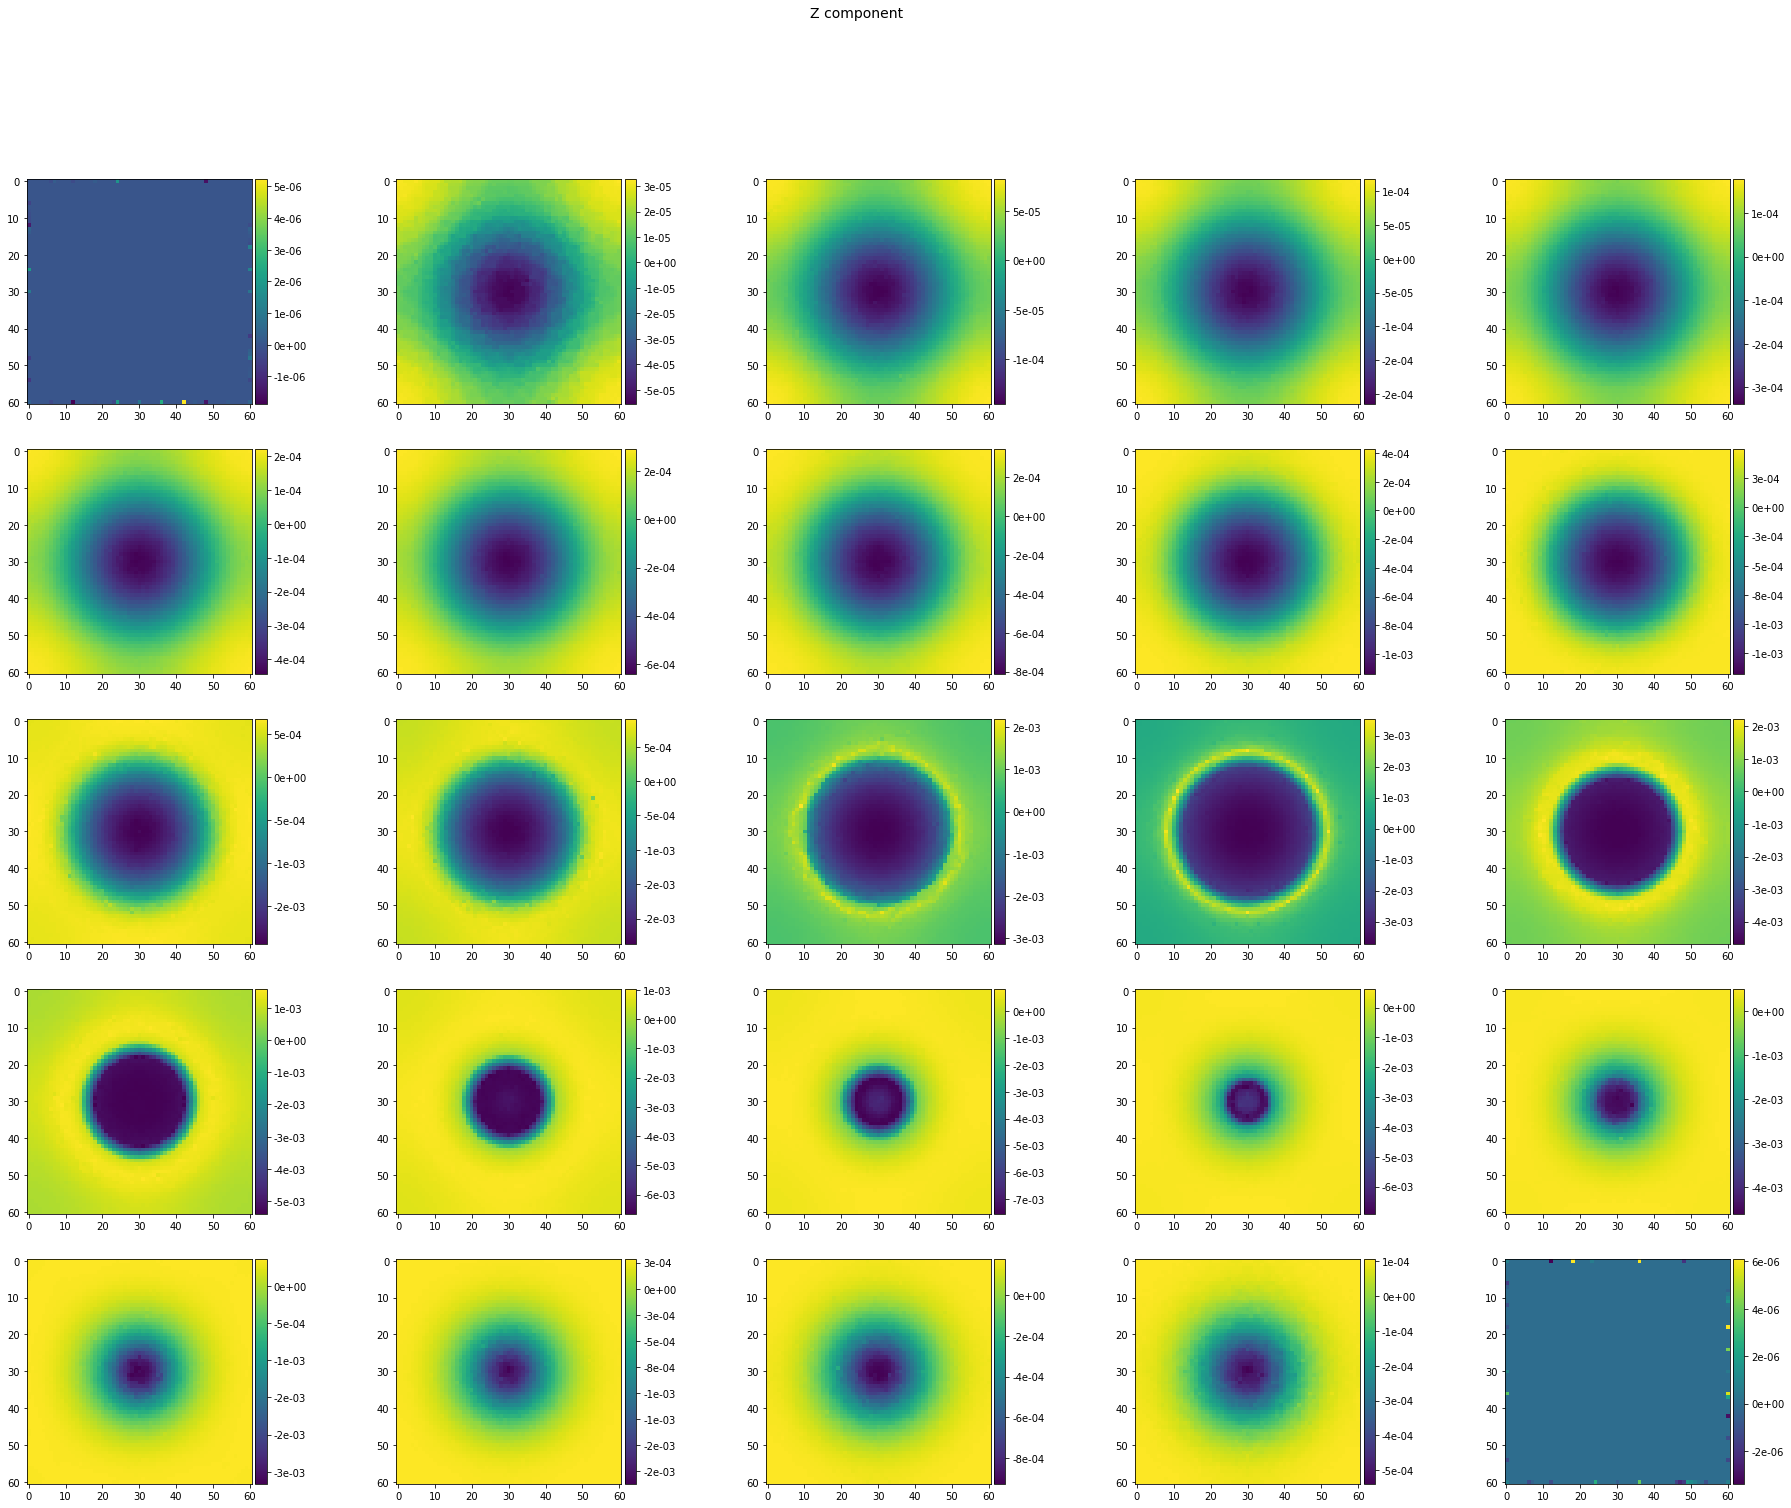

In [83]:
plot_2Dimg(data_3D,25)

## Create a NIFTI image

The NIFTI File that is saved at the end can be used in SIMNIBS.

Create an affine matrix to specify the matrix transformations. By default, it can be an identify matrix with value 1.

In [30]:
affine = np.eye(4); affine

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [559]:
img = nib.Nifti1Image(data_full, affine)

In [560]:
nib.save(img, os.path.join('./coils', 'cone_test_new.nii.gz'))

## Load NIFTI Image

In [86]:
img_load = nib.load('./coils/cone_test_new.nii.gz')

In [87]:
print(img_load.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 4 61 61 61  3  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [1. 0. 0. 0.]
srow_y          : [0. 1. 0. 0.]

## Plotting with NIFTI tools

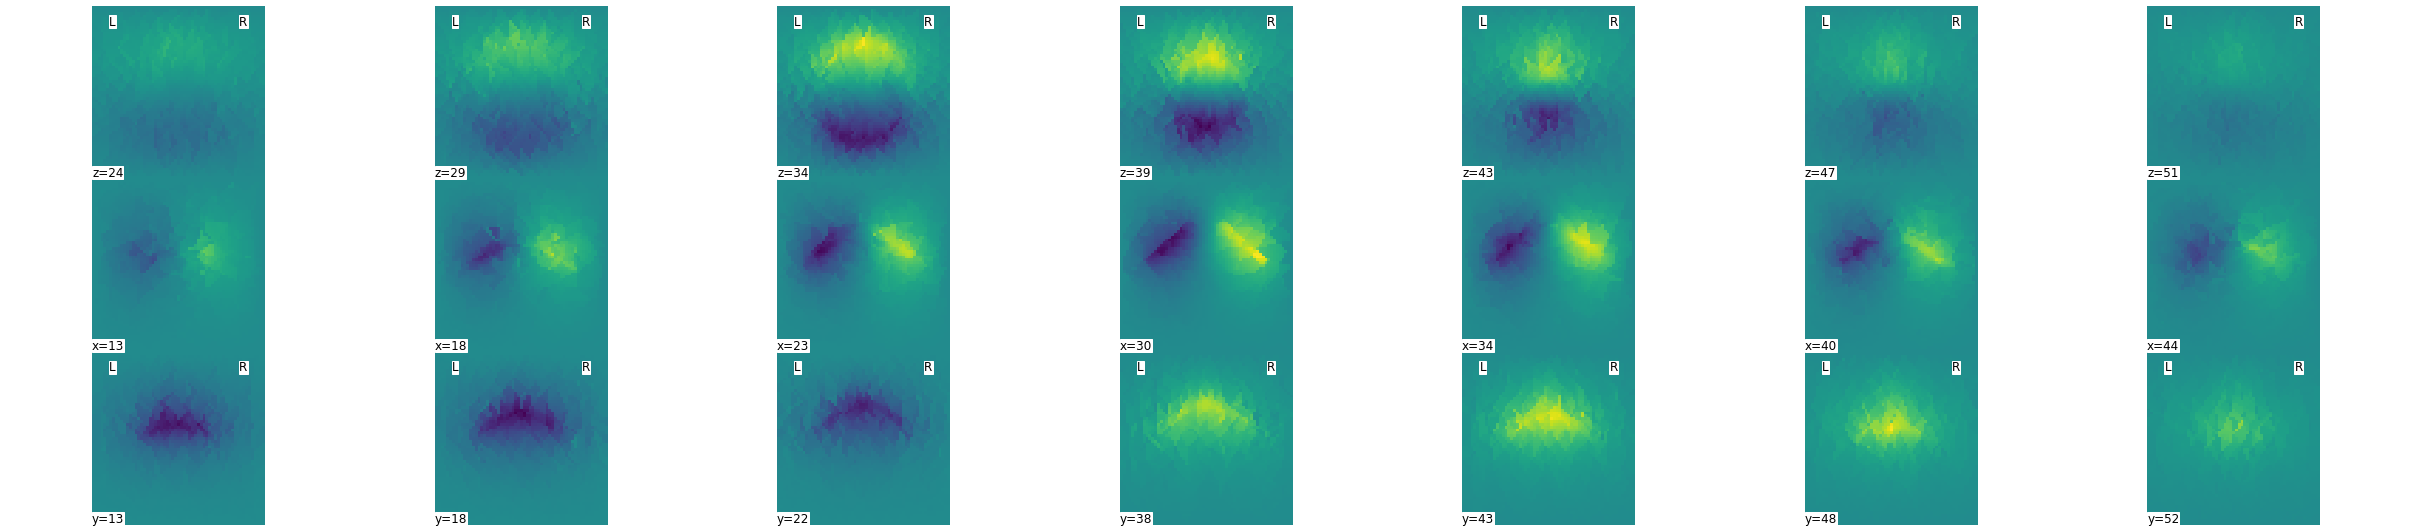

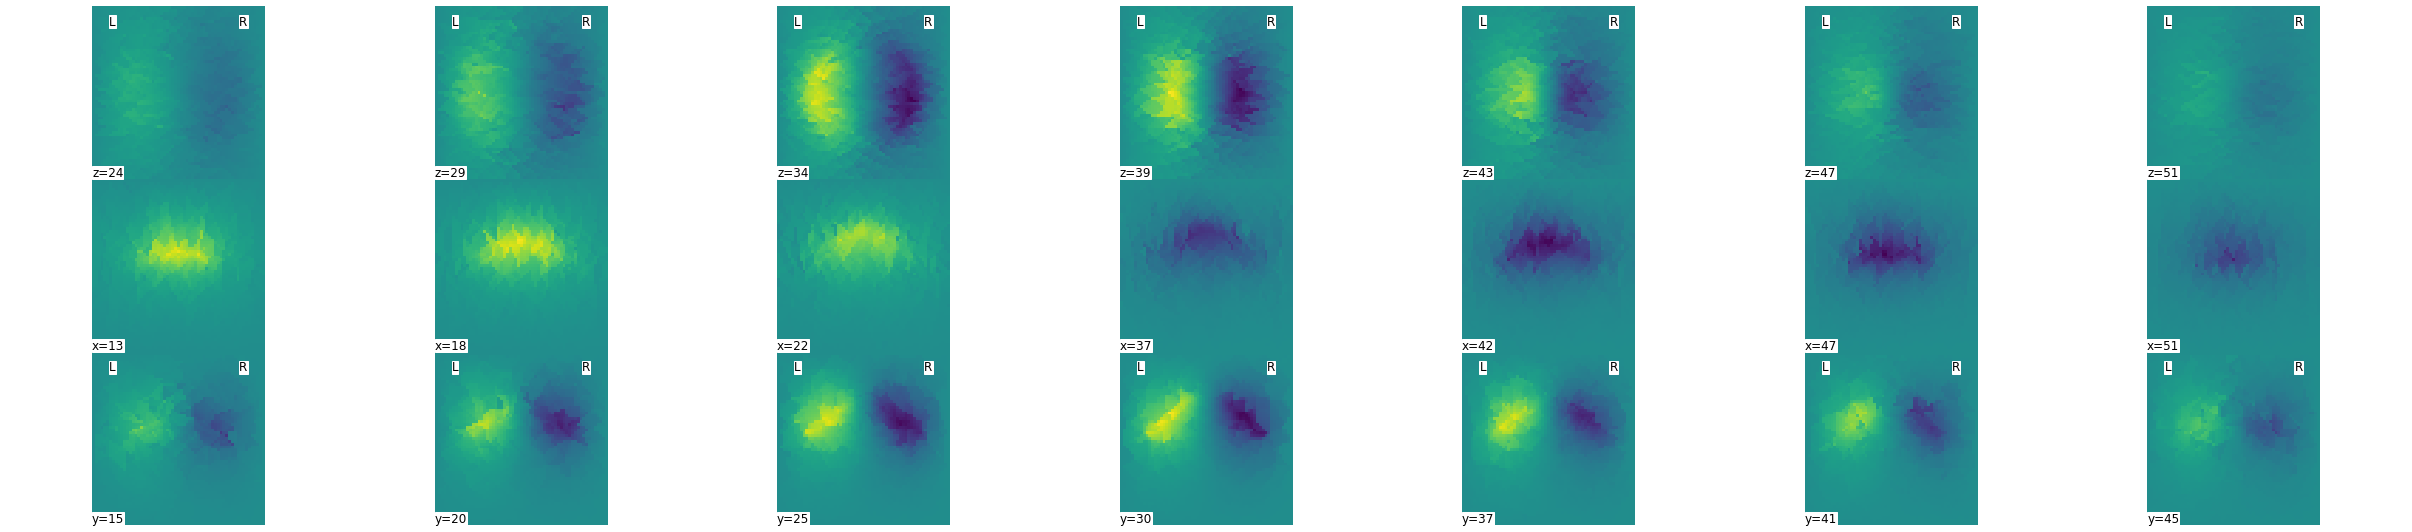

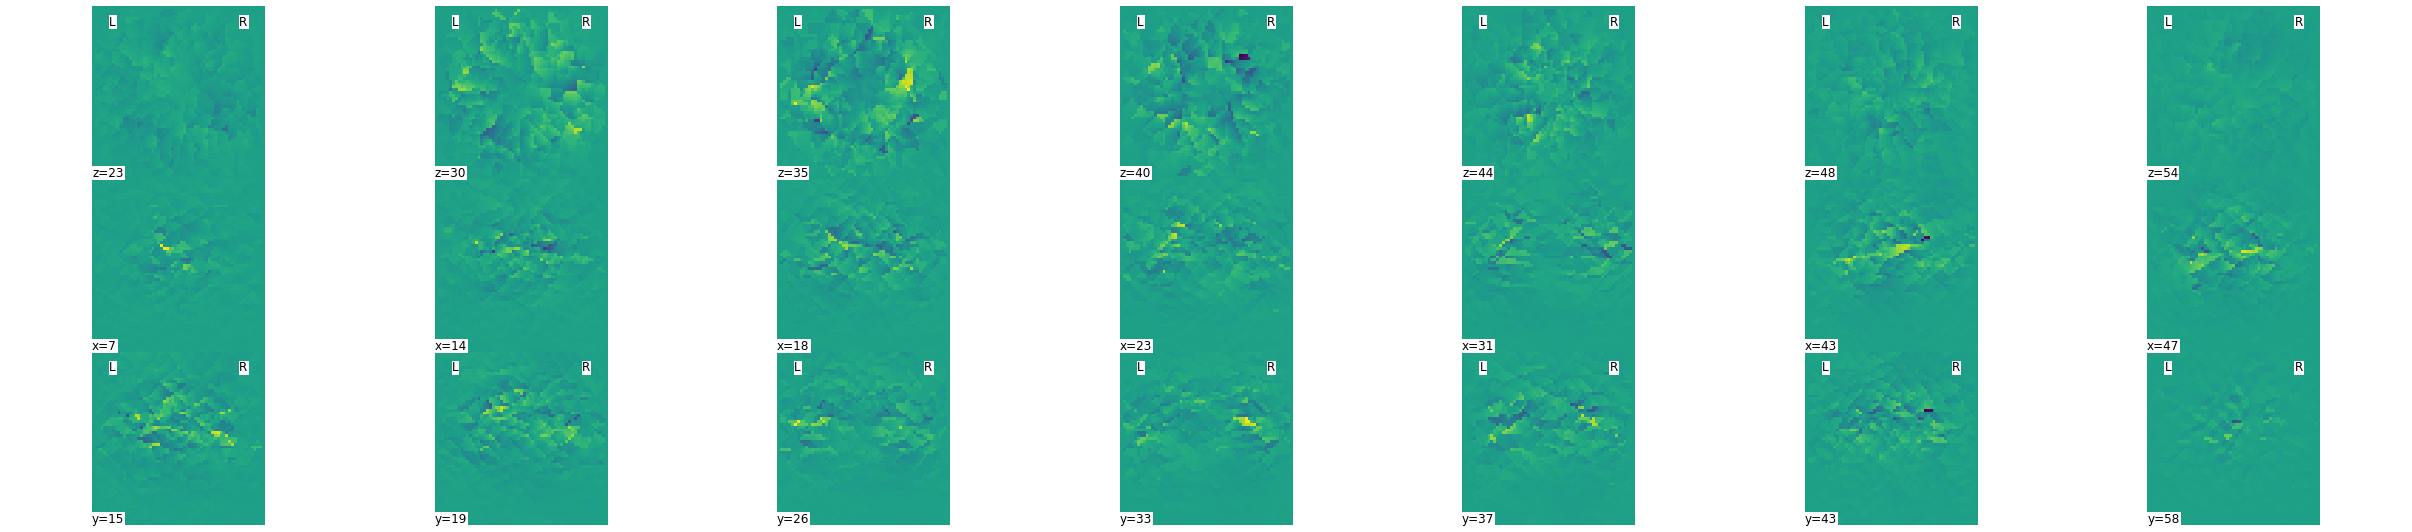

In [93]:
plotting.plot_img(image.index_img(img_load, 0),threshold=None,display_mode = 'mosaic')
plotting.plot_img(image.index_img(img_load, 1),threshold=None,display_mode = 'mosaic')
plotting.plot_img(image.index_img(img_load, 2),threshold=None,display_mode = 'mosaic')

# ZHI-DENG Coils

In [102]:
coil_files = glob.glob('/Users/Kaleem/Insai/Coils/SIMNIBS/simnibs-coils/*')

img = nib.load(coil_files[0])

View the image header below, see differences between Zhi-deng's coils and ours. For example, notice the difference in pixdim, xyzt_units, srow_x, srow_y and srow_z. I believe this has to do with the discretization and boundary boxes

In [96]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b'          '
db_name         : b'                  '
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 161 161  81   3   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.  2.5 2.5 2.5 1.  1.  1.  1. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'                                                                                '
aux_file        : b'                        '
qform_code      : unknown
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.

In [103]:
data = img.get_fdata();

## 2D Plot

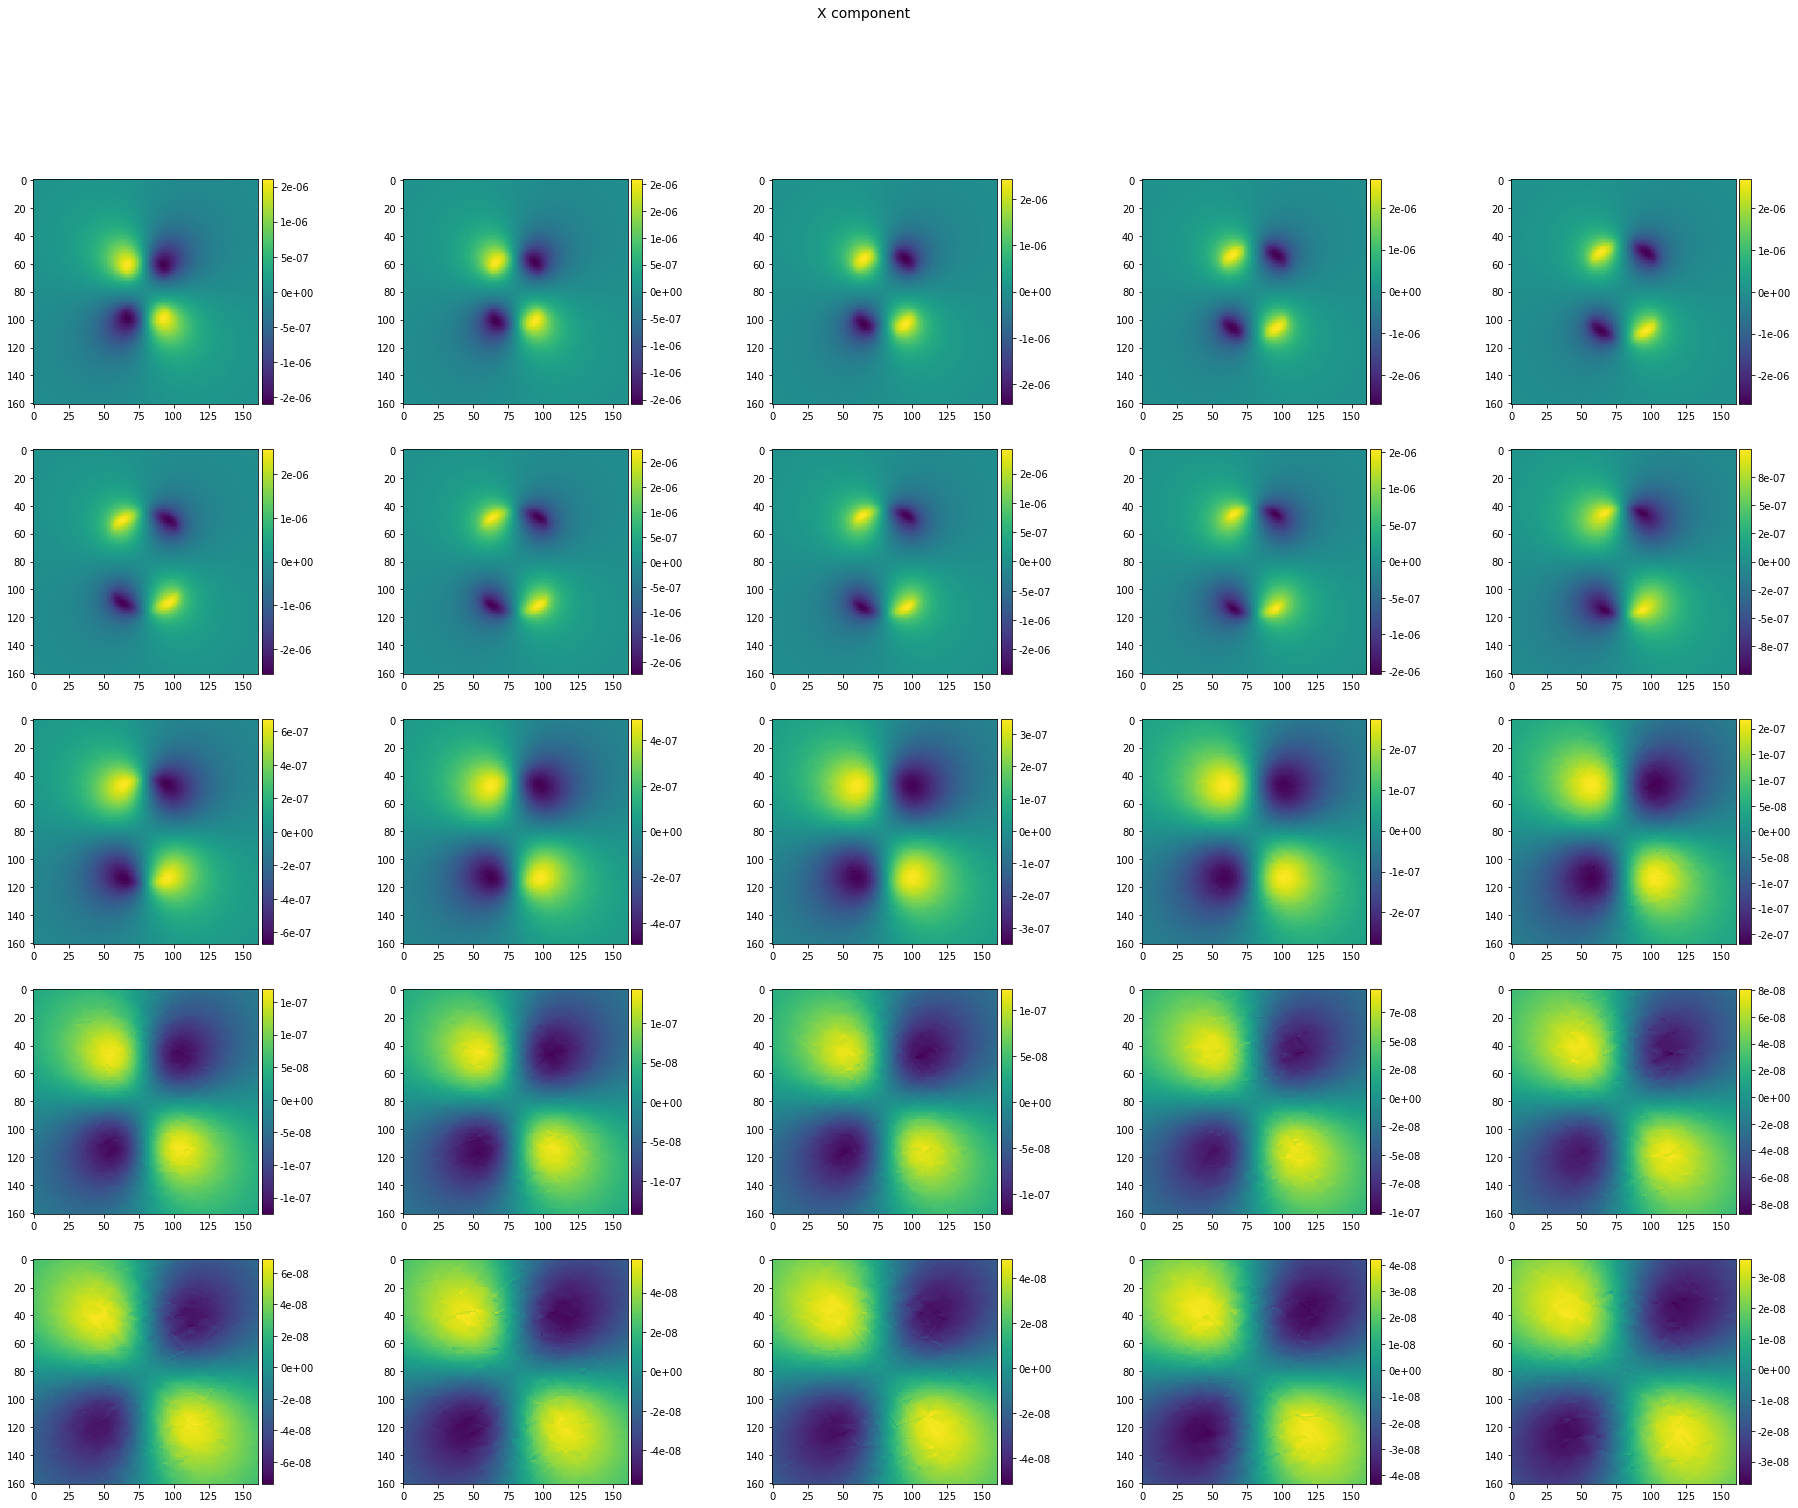

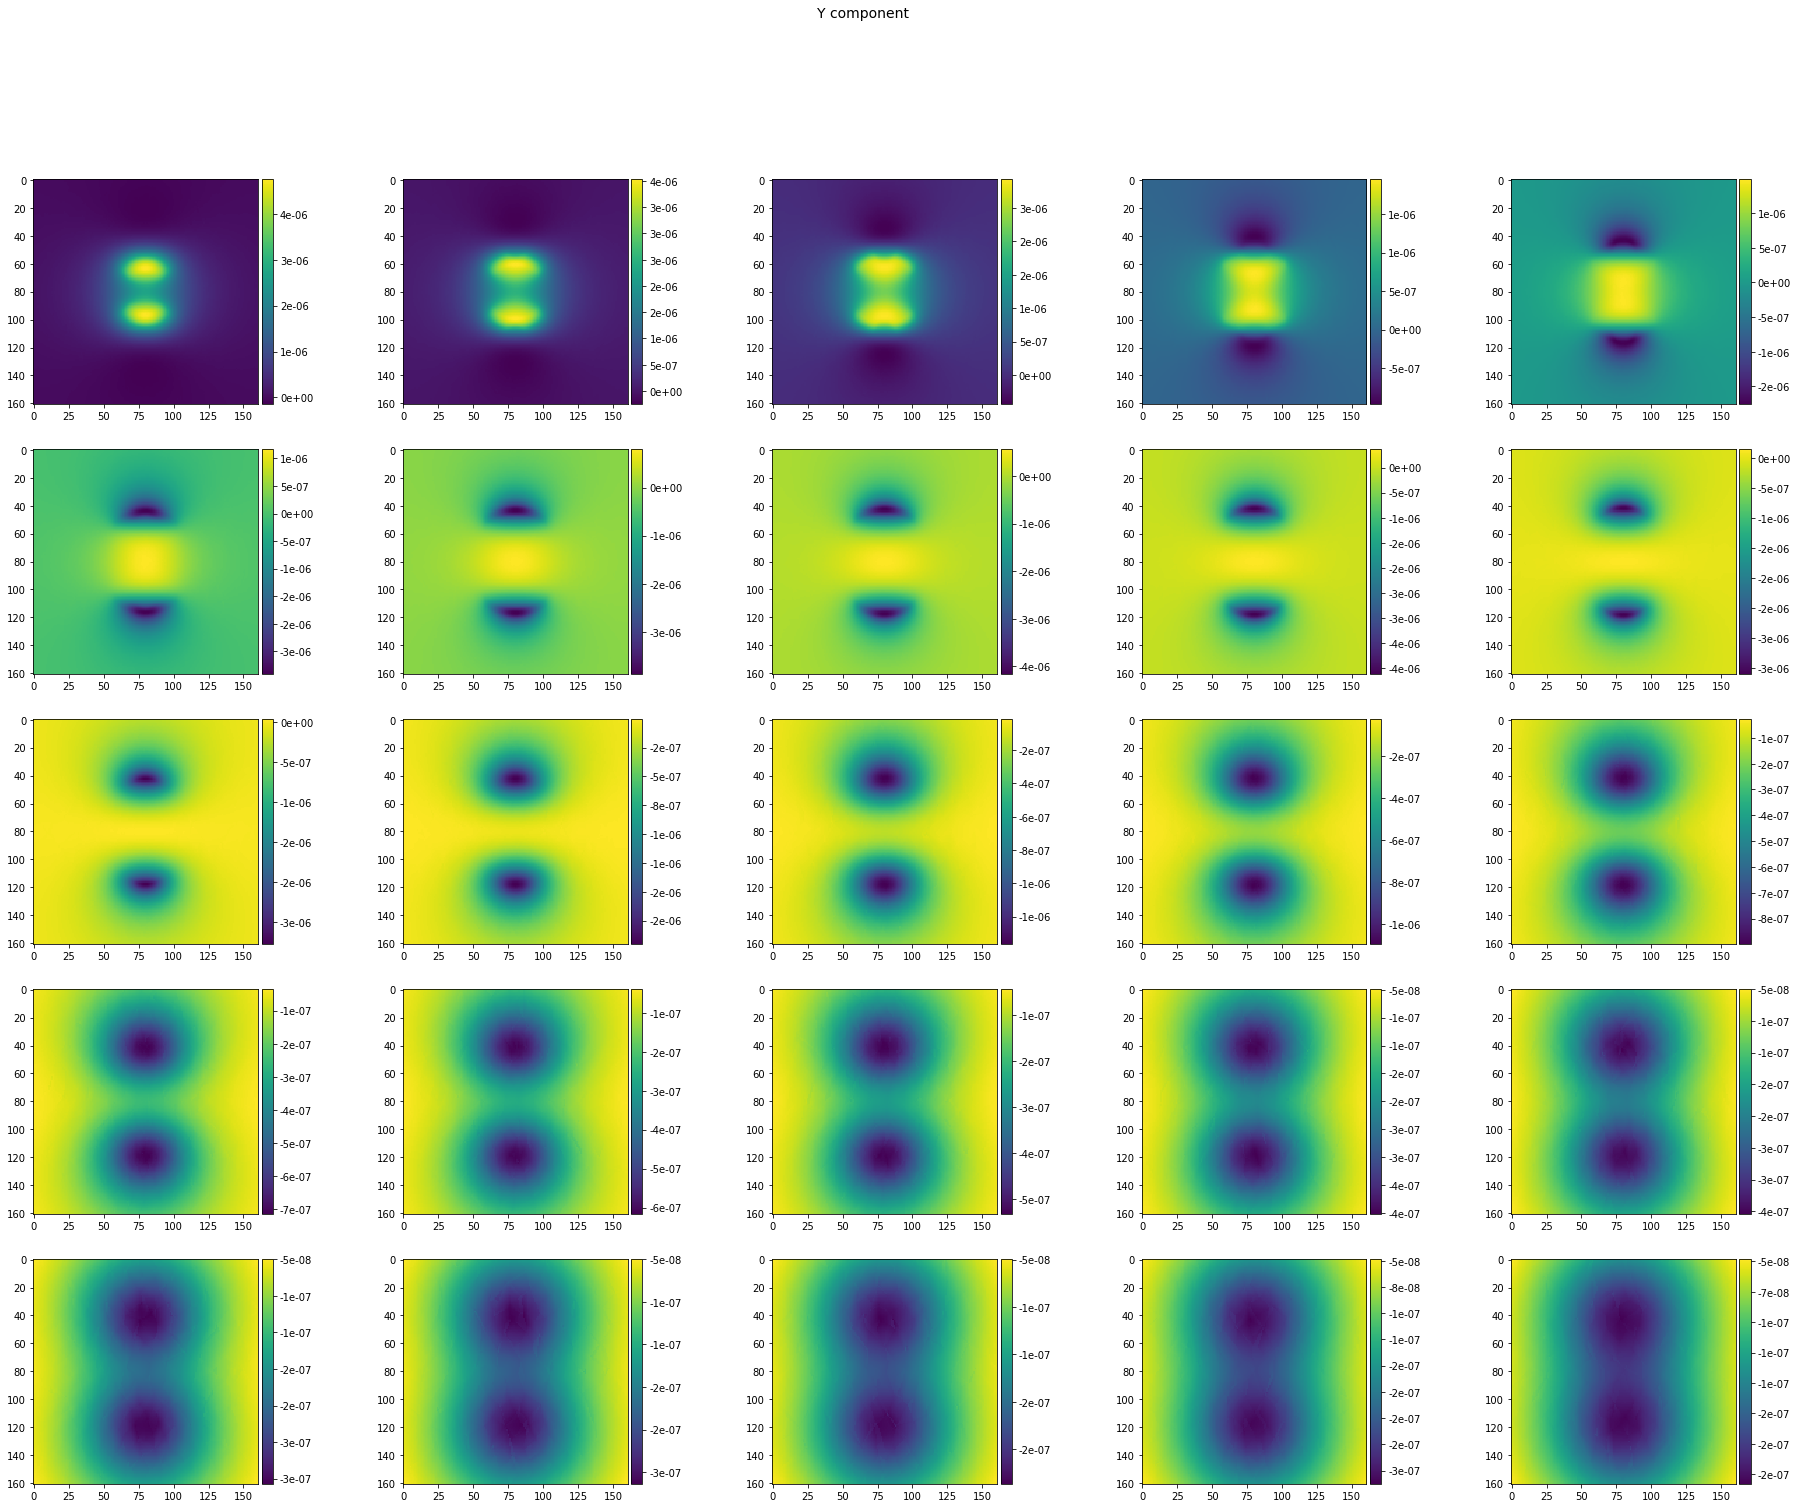

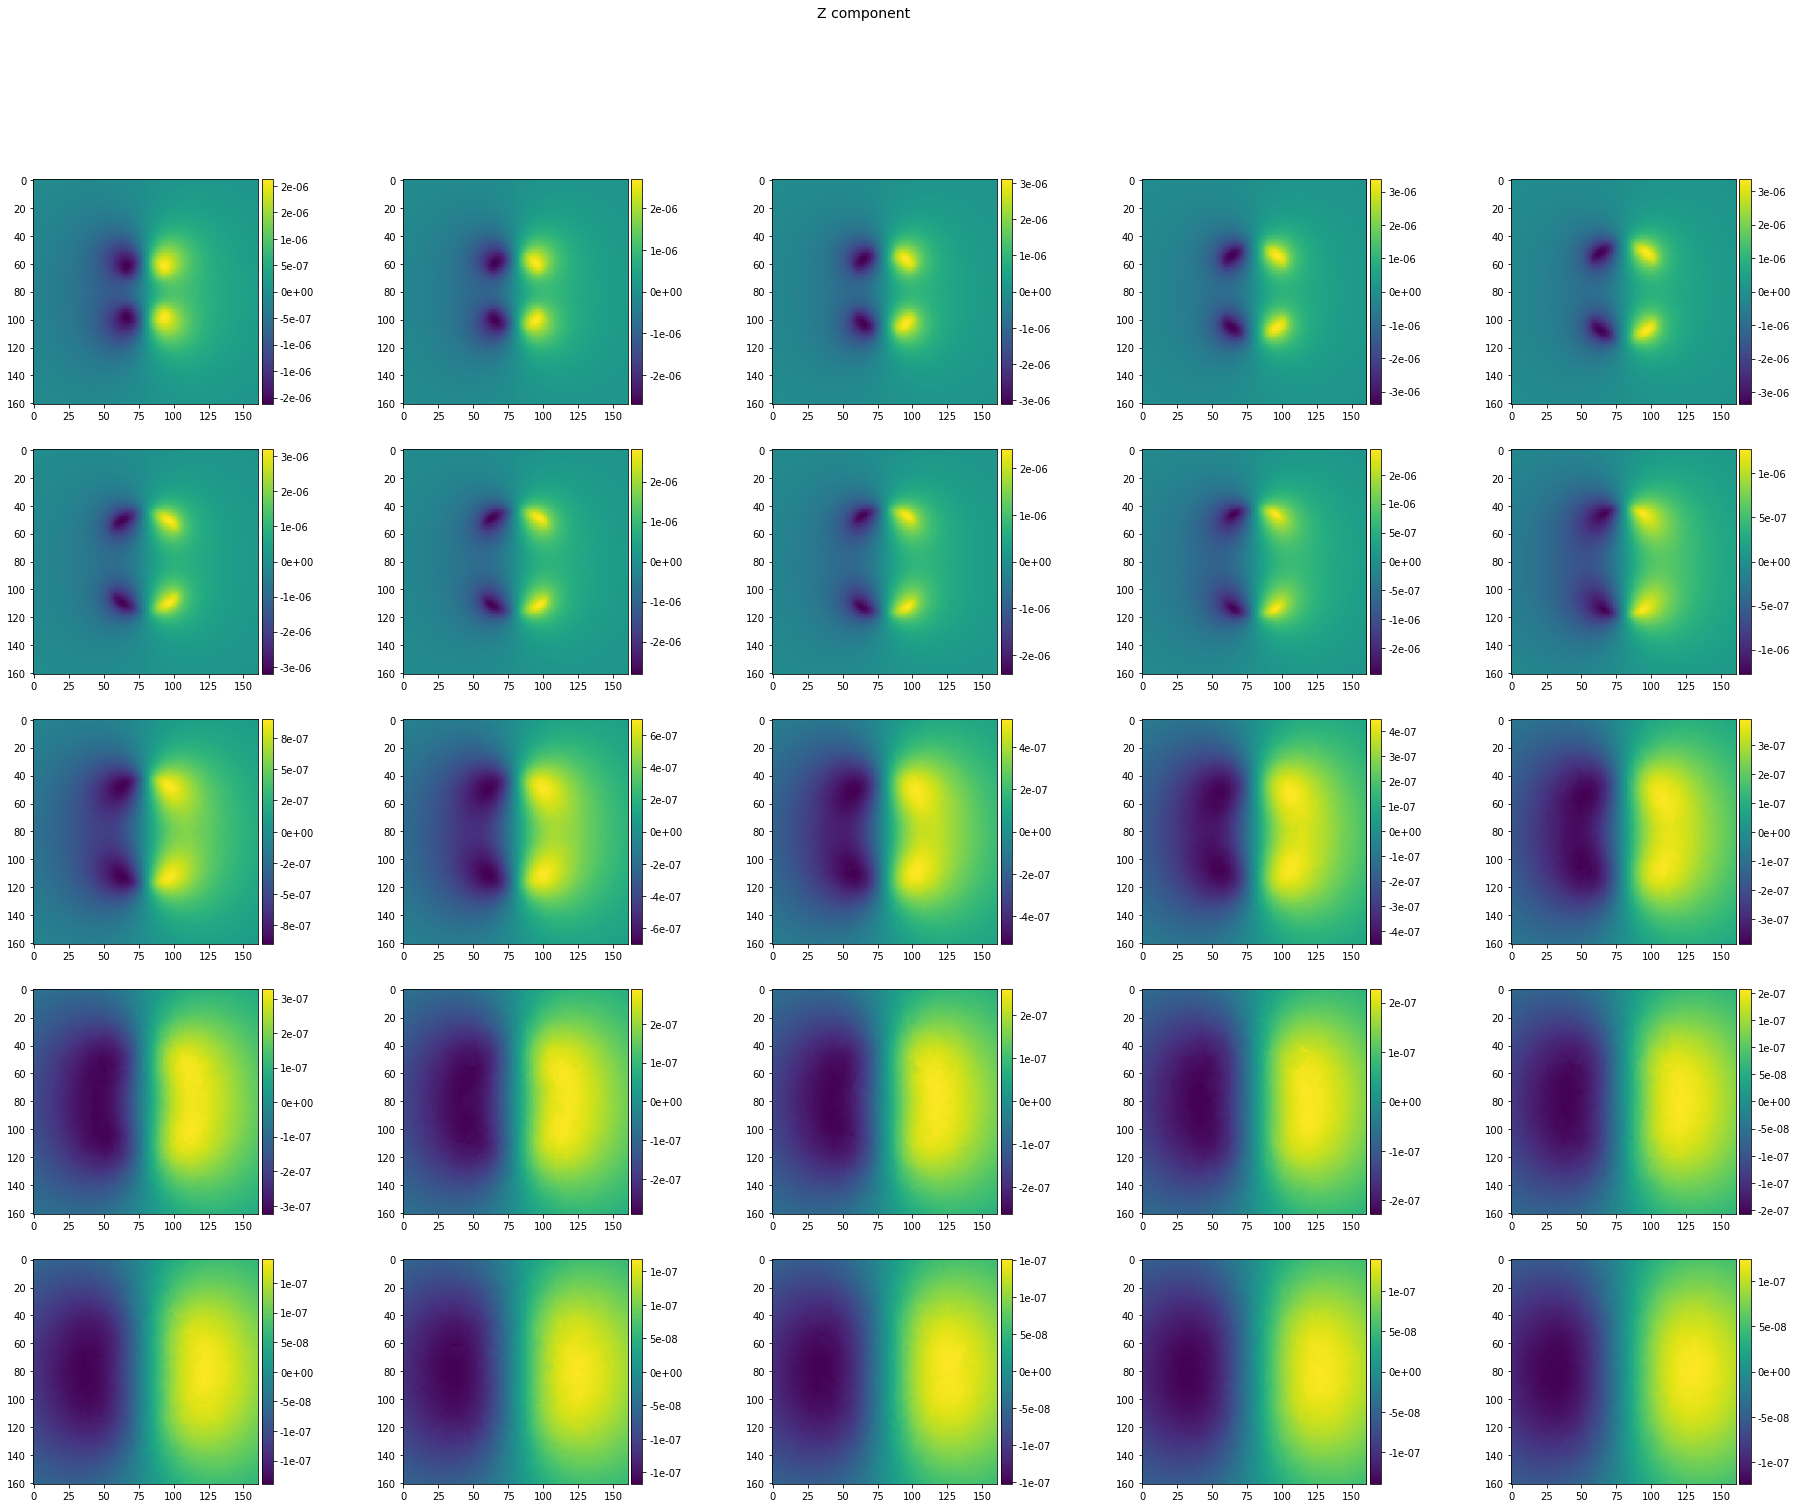

In [99]:
plot_2Dimg(data,25)

## Plotting with NIFTI tools

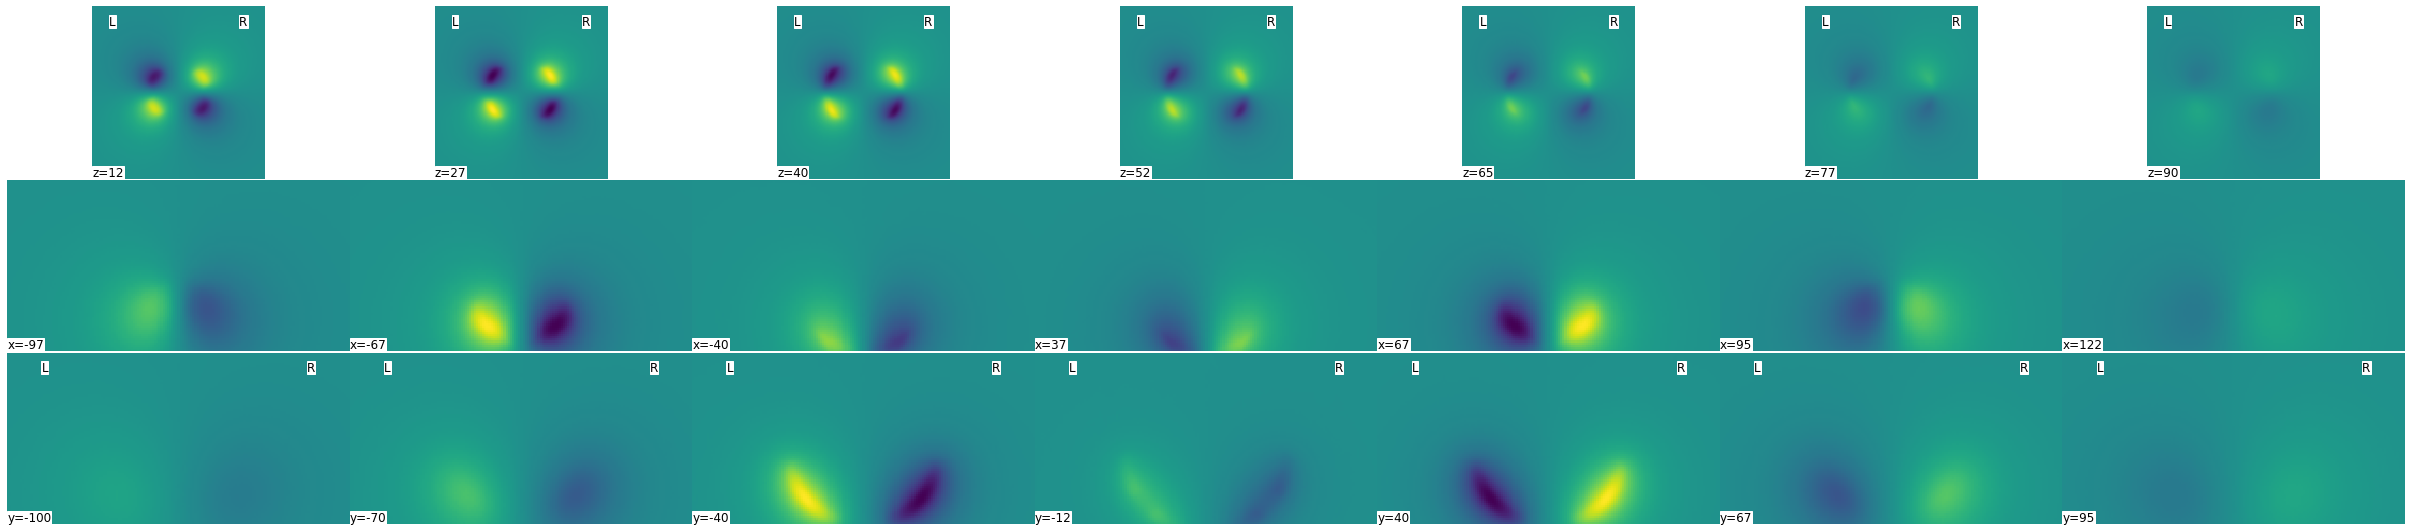

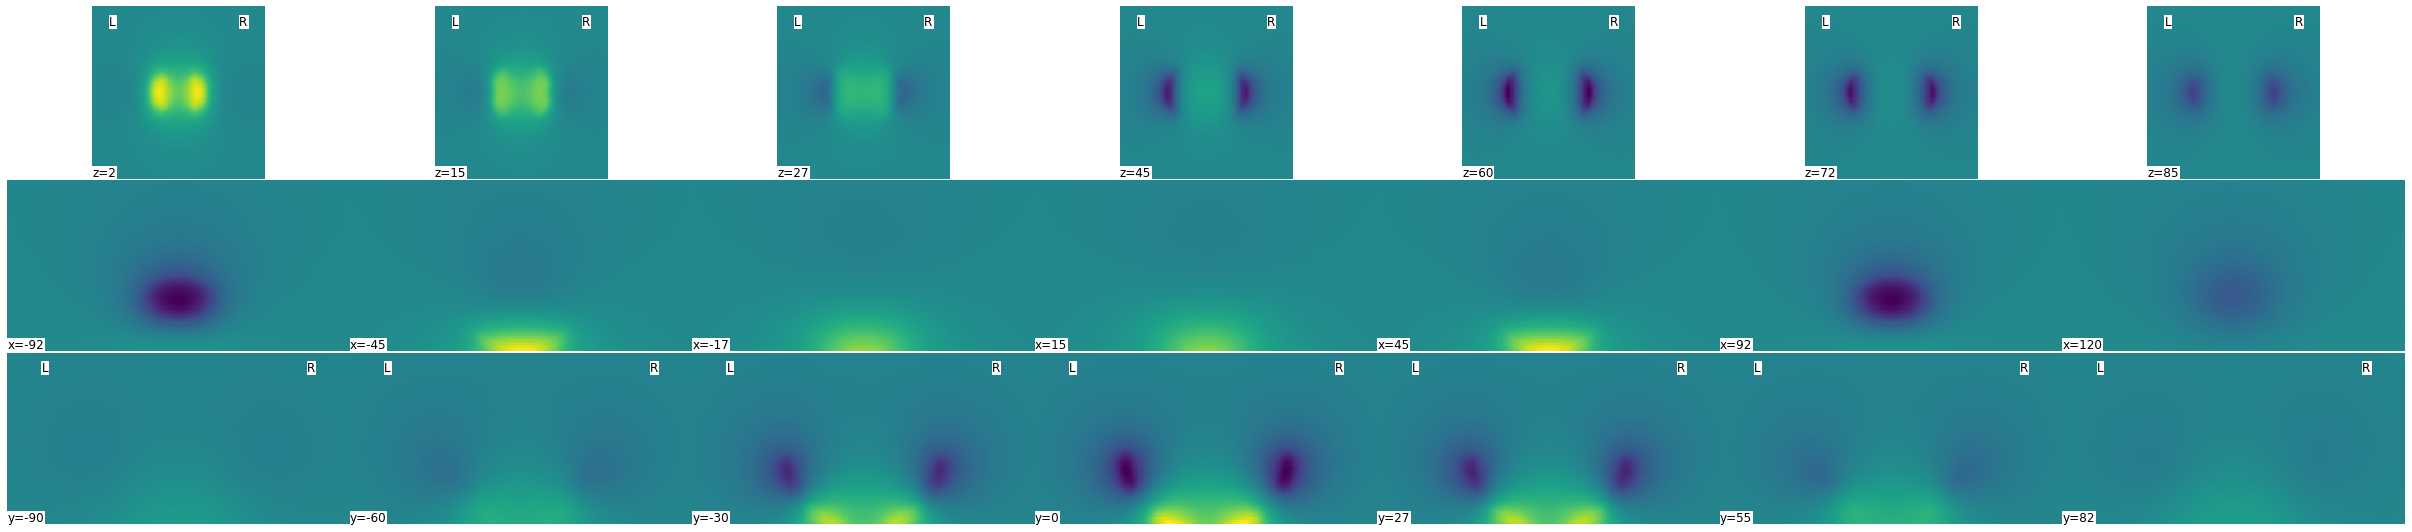

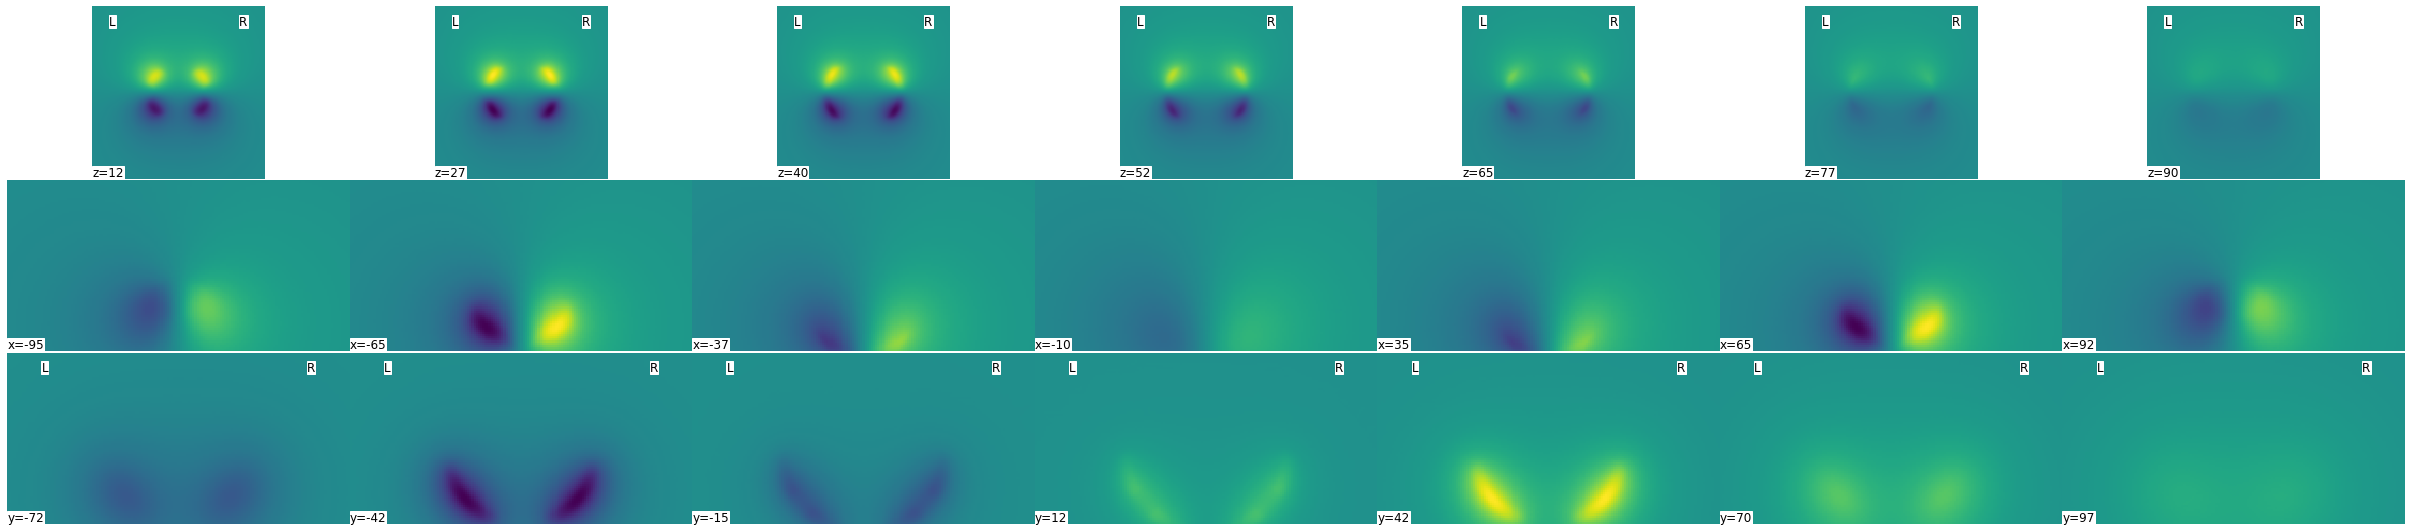

In [101]:
plotting.plot_img(image.index_img(img, 0),threshold=None,display_mode = 'mosaic')
plotting.plot_img(image.index_img(img, 1),threshold=None,display_mode = 'mosaic')
plotting.plot_img(image.index_img(img, 2),threshold=None,display_mode = 'mosaic')

# Archive

In [ ]:

# read the data
grid = pv.read('/Users/Kaleem/Downloads/VTK_Cone.vtu')

# plot the data with an automatically created Plotter
#grid.plot(show_scalar_bar=False, show_axes=False)

In [ ]:
coil_files = glob.glob('/Users/Kaleem/Insai/Coils/SIMNIBS/simnibs-coils/*')
for idx,coil_file in enumerate(coil_files):
    print(coil_file)
    plt.figure(idx+1)
    plotting.plot_img(image.index_img(coil_file, 0),threshold=None,display_mode = 'mosaic')
    #plotting.plot_stat_map(image.index_img(coil_file, 0))
    #img = nib.load(coil_file)
    
    #data = img.get_fdata(); 
    #plot_img(data)

    #print(img.header)

In [ ]:
coil_files = glob.glob('/Users/Kaleem/Insai/Coils/SIMNIBS/simnibs-coils/*')
for idx,coil_file in enumerate(coil_files[0:2]):
    print(coil_file)
    img = nib.load(coil_file)
    print(img.header['dim'])
    print(img.header['pixdim'])
    print(img.header.get_best_affine())
    print(img.header.get_qform())
    print(img.header.get_sform())
    print(img.header.get_xyzt_units())